In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('ODI-2022.csv', sep=';')
print(df.shape)
list(df.columns)

## Pie-chart for gender distribution

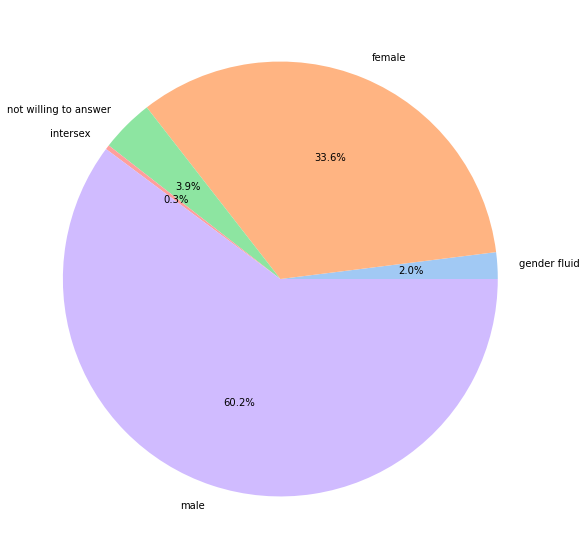

In [6]:
result = df.groupby('What is your gender?').size().sample(frac=1)

 
# Seaborn color palette to plot pie chart
palette_color = sns.color_palette('pastel')
  
plt.figure(figsize=(10, 10))


plt.pie(result.values, labels=result.index, colors=palette_color, autopct='%.1f%%')
plt.show()

## Histogram for stress level

In [7]:
df["What is your stress level (0-100)?"] = df["What is your stress level (0-100)?"].apply(pd.to_numeric, errors='coerce')
df["What is your stress level (0-100)?"].isna().sum()



7

In [8]:
# only keeps rows where stress is a number 
df =  df[df['What is your stress level (0-100)?'].notna()]

48.03468013468013
50.0


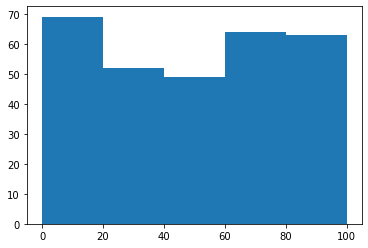

In [9]:
mask_high = df["What is your stress level (0-100)?"] > 100
column_name = 'What is your stress level (0-100)?'
df.loc[mask_high, column_name] = 100

mask_low = df["What is your stress level (0-100)?"] <0
column_name = 'What is your stress level (0-100)?'
df.loc[mask_low, column_name] = 0

print(df['What is your stress level (0-100)?'].mean())
print(df['What is your stress level (0-100)?'].median())

plt.hist(df['What is your stress level (0-100)?'],bins=5)
plt.show()

##  close to a uniform distribution

## Stress-levels and Machine Learning Course

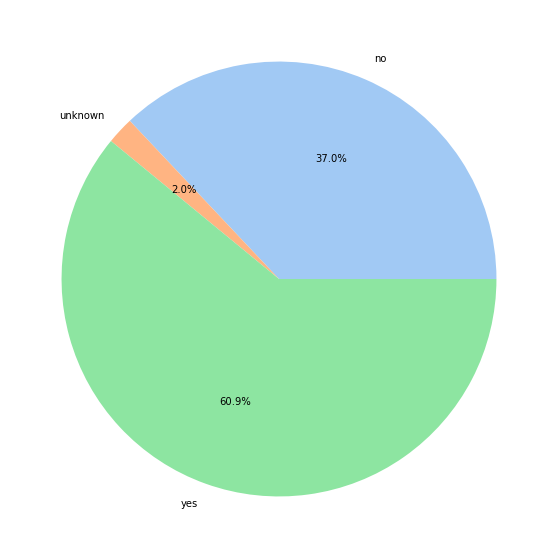

In [11]:
result = df.groupby('Have you taken a course on machine learning?').size()

# Seaborn color palette to plot pie chart
palette_color = sns.color_palette('pastel')


#palette_color = seaborn.color_palette('bright')
  
plt.figure(figsize=(10, 10))

# plotting data on chart
plt.pie(result.values, labels=result.index, colors=palette_color, autopct='%.1f%%')
  
# displaying chart
plt.show()

In [14]:
df_ml = df[df['Have you taken a course on machine learning?'] == "yes"]
df_no_ml = df[df['Have you taken a course on machine learning?'] == "no"]
print(df_ml.shape)
print(df_no_ml.shape)

print("mean of stress-level for people who took machine learning : ", df_ml.mean())
print("mean of stress-level for people who didn't take machine learning : ",df_no_ml.mean())

## z-test as sample size is large
import statsmodels.stats.weightstats as stests
ztest ,pval = stests.ztest(df_ml["What is your stress level (0-100)?"], x2=df_no_ml["What is your stress level (0-100)?"], value=0,alternative='two-sided')
print("p-value : ",float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
## we reject that means are same with 95% confidence level. Higher stress level for people who didn't take machine learning course    
## Therefore, mean are different. Having taken a machine learning course has a significant effect on the stress level. It helps.


(181, 17)
(110, 17)
mean of stress-level for people who took machine learning :  What is your stress level (0-100)?    44.527624
dtype: float64
mean of stress-level for people who didn't take machine learning :  What is your stress level (0-100)?    53.870909
dtype: float64
p-value :  0.014235561826884072
reject null hypothesis


## Stress-levels and Database Course

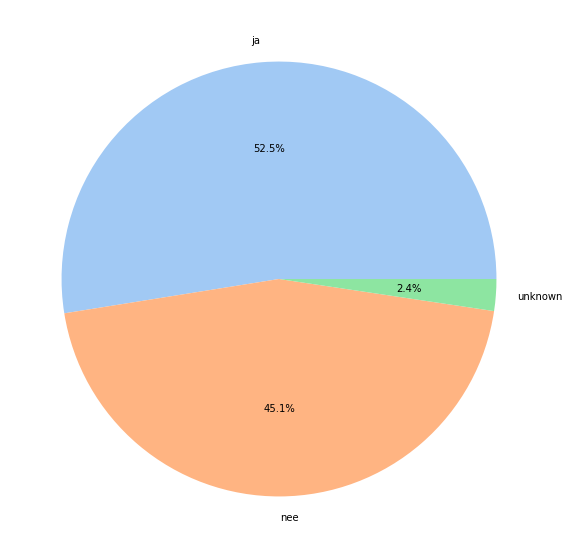

In [15]:
result = df.groupby('Have you taken a course on databases?').size()

# Seaborn color palette to plot pie chart
palette_color = sns.color_palette('pastel')


#palette_color = seaborn.color_palette('bright')
  
plt.figure(figsize=(10, 10))

# plotting data on chart
plt.pie(result.values, labels=result.index, colors=palette_color, autopct='%.1f%%')
  
# displaying chart
plt.show()

In [16]:

rslt_df_database_yes = df[df["Have you taken a course on databases?"]== "ja"]
rslt_df_database_no = df[df['Have you taken a course on databases?']== "nee"]
print(rslt_df_database_yes.shape)
print(rslt_df_database_no.shape)

print(rslt_df_database_yes["What is your stress level (0-100)?"]. mean())
print(rslt_df_database_no["What is your stress level (0-100)?"]. mean())

## z-test as sample size is large
import statsmodels.stats.weightstats as stests
ztest ,pval = stests.ztest(rslt_df_database_yes["What is your stress level (0-100)?"], x2=rslt_df_database_no["What is your stress level (0-100)?"], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
# Therefore, people who have taken database course have lower stress level (95% confidence level)

(156, 17)
(134, 17)
43.88012820512821
52.656716417910445
0.019535217682604737
reject null hypothesis


## Most frequent reponses for  -  What makes a good day ?


In [17]:
df["What makes a good day for you (1)?"] = df["What makes a good day for you (1)?"].str.lower()

#sleep = ["good sleep","good night of sleep","a lot of sleep","8 hours of sleep","sleep"]
#food = ["good food","food"]
weather = ["good weather","weather","sunny weather","sunny","sunshine","nice weather","sun","warm"]
physical = ["gym","physical","play","sport","excercise","biking","cycling","bike","cycle"]

#df.loc[df["What makes a good day for you (1)?"].isin(sleep), "What makes a good day for you (1)?"] = "sleep"



df.loc[df["What makes a good day for you (1)?"].str.contains("sleep"), "What makes a good day for you (1)?"] = "sleep"
df.loc[df["What makes a good day for you (1)?"].str.contains("friends"), "What makes a good day for you (1)?"] = "friends"


df.loc[df["What makes a good day for you (1)?"].str.contains("beer"), "What makes a good day for you (1)?"] = "alcohol"
df.loc[df["What makes a good day for you (1)?"].str.contains("alcohol"), "What makes a good day for you (1)?"] = "alcohol"

df.loc[df["What makes a good day for you (1)?"].str.contains("food"), "What makes a good day for you (1)?"] = "food"
df.loc[df["What makes a good day for you (1)?"].str.contains("coffee"), "What makes a good day for you (1)?"] = "coffee"

for w in weather:
    df.loc[df["What makes a good day for you (1)?"].str.contains(w), "What makes a good day for you (1)?"] = "weather"

for phy in physical:
    df.loc[df["What makes a good day for you (1)?"].str.contains(phy), "What makes a good day for you (1)?"] = "exercise"

In [26]:
counter = df["What makes a good day for you (1)?"].value_counts()[0:10]
counter

weather      71
food         34
sleep        21
friends      15
exercise     11
coffee       11
alcohol       8
chocolate     4
sex           4
cake          2
Name: What makes a good day for you (1)?, dtype: int64

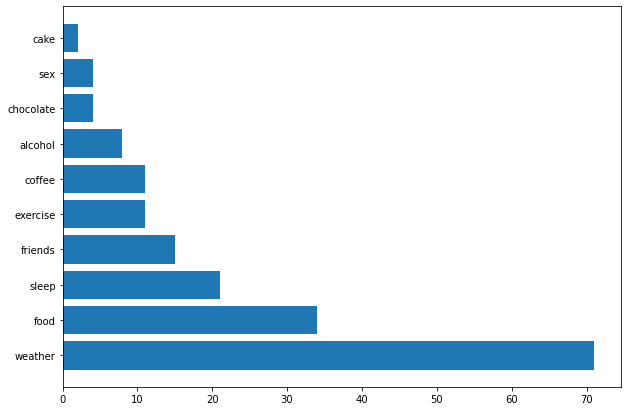

In [23]:
counter
fig = plt.figure(figsize =(10, 7))
plt.barh(counter.index,counter.values)

plt.show()

#### Conclusion : Top mood boosters - good weather and good food